### import necessary libraries

In [138]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt

### preprocessing and EDA 

Data 1

In [4]:
joy=pd.read_csv('data/joy.csv')
sad=pd.read_csv('data/sad.csv')
surprise=pd.read_csv('data/surprise.csv')
fear=pd.read_csv('data/fear.csv')
disgust=pd.read_csv('data/disgust.csv')
anger=pd.read_csv('data/anger.csv')
df = pd.concat([joy,sad,surprise,fear,disgust,anger],axis=0)

In [10]:
maindf = df[['tweet','emotion']]

In [11]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113829 entries, 0 to 20068
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   tweet    113829 non-null  object
 1   emotion  113829 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [12]:
maindf.describe()

,tweet,emotion
count,113829,113829
unique,110638,6
top,برای شکست و ناامیدی دشمن\n#رای_میدهم,sad
freq,23,34328


In [15]:
maindf.head()

,tweet,emotion
0,ــــــــــــ\nكرمهاي ساقه خوار\nبه جان ريشههاي...,joy
1,كرمهاي ساقه خوار\nبه جان ريشههاي انقلاب و نظام...,joy
2,انتخابات، واجبی هست\nکه اگر غفلت شود فرصتی برا...,joy
3,ــــــــــــ👌🤞\nكرمهاي ساقه خوار\nبه جان ريشهه...,joy
4,كرمهاي ساقه خوار\nبه جان ريشههاي انقلاب و نظام...,joy


In [13]:
maindf.emotion.value_counts()

sad         34328
joy         28024
anger       20069
fear        17624
surprise    12859
disgust       925
Name: emotion, dtype: int64

In [17]:
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

In [18]:
fig = px.bar(
    data_frame=maindf.emotion.value_counts().rename_axis(['هیجان']).reset_index(name='تعداد'),
    x="هیجان",
    y="تعداد",
    color="هیجان"
)

fig.update_layout(title_text='توزیع داده هیجان', title_x=0.5)

pyo.iplot(fig, filename = 'توزیع داده هیجان')

In [21]:
fig = px.pie(maindf.emotion.value_counts().rename_axis(['هیجان']).reset_index(name='تعداد'), values='تعداد', names='هیجان', hover_data=['هیجان'])
fig.update_layout(title_text="هیجان", title_x=0.5)
pyo.iplot(fig, filename = 'توزیع داده هیجان')

Data 2

In [44]:
test = pd.read_table('data/test.tsv',header=None)
train = pd.read_table('data/train.tsv',header=None)

In [45]:
test.rename(columns={0:'tweet',1:'emotion'},inplace=True)
train.rename(columns={0:'tweet',1:'emotion'},inplace=True)
maindf1=pd.concat([train,test],axis=0)

In [46]:
maindf1.head()

,tweet,emotion
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
3,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,OTHER
4,اين وضع ب طرز خنده داري گريه داره ...,SAD


In [47]:
maindf1.emotion.value_counts()

OTHER       1874
SAD         1158
ANGRY       1077
HAPPY        893
SURPRISE     884
FEAR         814
HATE         576
Name: emotion, dtype: int64

In [39]:
fig = px.bar(
    data_frame=maindf1.emotion.value_counts().rename_axis(['هیجان']).reset_index(name='تعداد'),
    x="هیجان",
    y="تعداد",
    color="هیجان"
)

fig.update_layout(title_text='توزیع داده هیجان', title_x=0.5)

pyo.iplot(fig, filename = 'توزیع داده هیجان')

In [40]:
fig = px.pie(maindf1.emotion.value_counts().rename_axis(['هیجان']).reset_index(name='تعداد'), values='تعداد', names='هیجان', hover_data=['هیجان'])
fig.update_layout(title_text="هیجان", title_x=0.5)
pyo.iplot(fig, filename = 'توزیع داده هیجان')

#### Concat discussed and Hate of dataset together

In [65]:
hatedf= maindf1[maindf1['emotion']=='HATE']

In [66]:
hatedf['emotion'].replace('HATE','disgust',inplace=True)

C:\Users\mahan\AppData\Local\Temp\ipykernel_10992\1548398171.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
hatedf.head()

,tweet,emotion
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,disgust
5,خب من رسما از یک نفر متنفرم،چون از گربه بدش می...,disgust
42,لعنت به اون روبالشی که پاکتش روی کار دوخته شده. …,disgust
43,به توییتر حس خیلی خوبی دارم اینجا خودمم خود وا...,disgust
52,چرا یه دختر باید به حدی از تنفر رسیده باشه که ...,disgust


In [68]:
maindf=pd.concat([maindf,hatedf],axis=0)

In [70]:
maindf.emotion.value_counts()

sad         34328
joy         28024
anger       20069
fear        17624
surprise    12859
disgust      1501
Name: emotion, dtype: int64

In [71]:
fig = px.bar(
    data_frame=maindf.emotion.value_counts().rename_axis(['هیجان']).reset_index(name='تعداد'),
    x="هیجان",
    y="تعداد",
    color="هیجان"
)

fig.update_layout(title_text='توزیع داده هیجان', title_x=0.5)

pyo.iplot(fig, filename = 'توزیع داده هیجان')

In [72]:
fig = px.pie(maindf.emotion.value_counts().rename_axis(['هیجان']).reset_index(name='تعداد'), values='تعداد', names='هیجان', hover_data=['هیجان'])
fig.update_layout(title_text="هیجان", title_x=0.5)
pyo.iplot(fig, filename = 'توزیع داده هیجان')

Data is Imbalance so undersample to lower count data

In [73]:
from imblearn.under_sampling import RandomUnderSampler

In [74]:
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=1)
df_balanced, balanced_labels = rus.fit_resample(maindf, maindf['emotion'])

In [77]:
fig = px.bar(df_balanced['emotion'].value_counts().rename_axis('هیجان').reset_index(name='تعداد'), x="هیجان", y="تعداد", color="تعداد")
fig.update_layout(title_text="توزیع داده هیجان", title_x=0.5)
pyo.iplot(fig, filename = 'توزیع داده هیجان')

Train and Test Split

In [118]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [119]:
X = df_balanced['tweet']
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X)
X=tokenizer.texts_to_sequences(X)
X=pad_sequences(X,maxlen=100)

In [112]:
set(df_balanced['emotion'].tolist())

{'anger', 'disgust', 'fear', 'joy', 'sad', 'surprise'}

In [113]:
label2id={'joy':0,'sad':1,'anger':2,'disgust':3,'fear':4,'surprise':5}

In [114]:
df_balanced['emotion']=df_balanced['emotion'].apply(lambda x : label2id[x])

In [115]:
set(df_balanced['emotion'].tolist())

{0, 1, 2, 3, 4, 5}

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_balanced['emotion'], test_size=0.2, random_state=42,stratify=df_balanced['emotion']) 

In [125]:
len(X_train)

7204

In [82]:
len(X_test)

1802

In [127]:
y_train_cat = to_categorical(y_train, 6)
y_test_cat = to_categorical(y_test, 6)

BiDirectional LSTM

In [130]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten, LSTM, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard

In [132]:
rnn_model = keras.Sequential([
    keras.layers.Embedding(input_dim=20000, output_dim=32, input_shape=(X_train.shape[1],)),
    keras.layers.Bidirectional(layers.LSTM(512,return_sequences=True)),
    keras.layers.Bidirectional(layers.LSTM(256,return_sequences=True)),
    keras.layers.Bidirectional(layers.LSTM(128,return_sequences=True)),
    keras.layers.Bidirectional(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
],name='BILSTM')

In [133]:
rnn_model.summary()

Model: "BILSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           640000    
                                                                 
 bidirectional (Bidirection  (None, 100, 1024)         2232320   
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 512)          2623488   
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 100, 256)          656384    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               164352    
 onal)                                                      

In [135]:
rnn_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [136]:
rnn_model.fit(X_train, y_train_cat, epochs=3,
              validation_data=(X_test, y_test_cat),
              validation_steps=30)

Epoch 1/3
226/226 [==============================] - 1217s 5s/step - loss: 1.7704 - accuracy: 0.2104 - val_loss: 1.6954 - val_accuracy: 0.2686
Epoch 2/3
226/226 [==============================] - 1168s 5s/step - loss: 1.5553 - accuracy: 0.3202 - val_loss: 1.4659 - val_accuracy: 0.3435
Epoch 3/3
226/226 [==============================] - 1188s 5s/step - loss: 1.2567 - accuracy: 0.4311 - val_loss: 1.3219 - val_accuracy: 0.4112


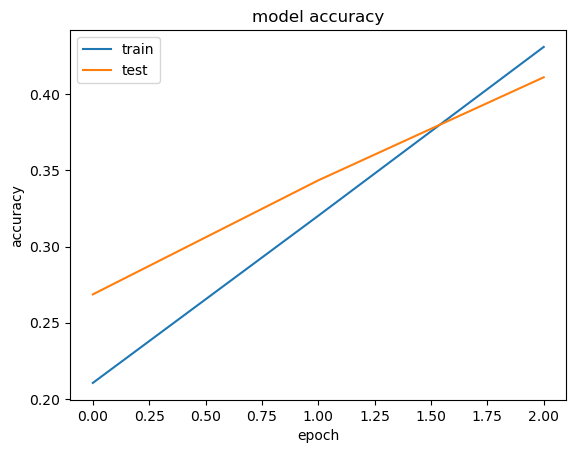

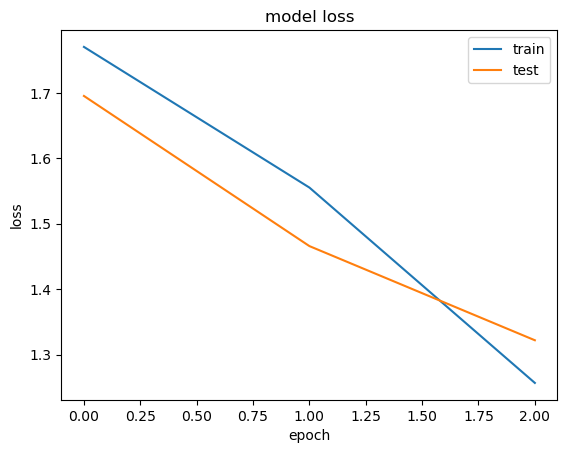

In [141]:
plt.plot(rnn_model.history.history['accuracy'])
plt.plot(rnn_model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(rnn_model.history.history['loss'])
plt.plot(rnn_model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [158]:
rnn_model.save('emotion.h5')

c:\Users\mahan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

